<a href="https://colab.research.google.com/github/venkatamogili/Netflix_Data_Analysis/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
netflix_data = pd.read_csv('netflix_titles.csv')

In [ ]:
sns.set_style('darkgrid')
netflix_data.shape

(8807, 12)

In [ ]:
netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix_data.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
netflix_data_cleaned = netflix_data.dropna()

In [ ]:
netflix_data_cleaned.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
netflix_data_cleaned.shape

(5332, 12)

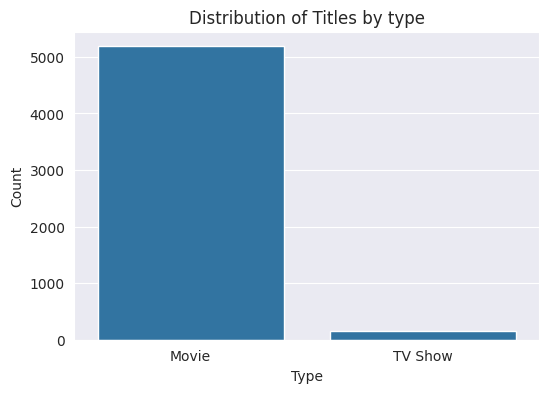

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='type',data=netflix_data_cleaned)
plt.title("Distribution of Titles by type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

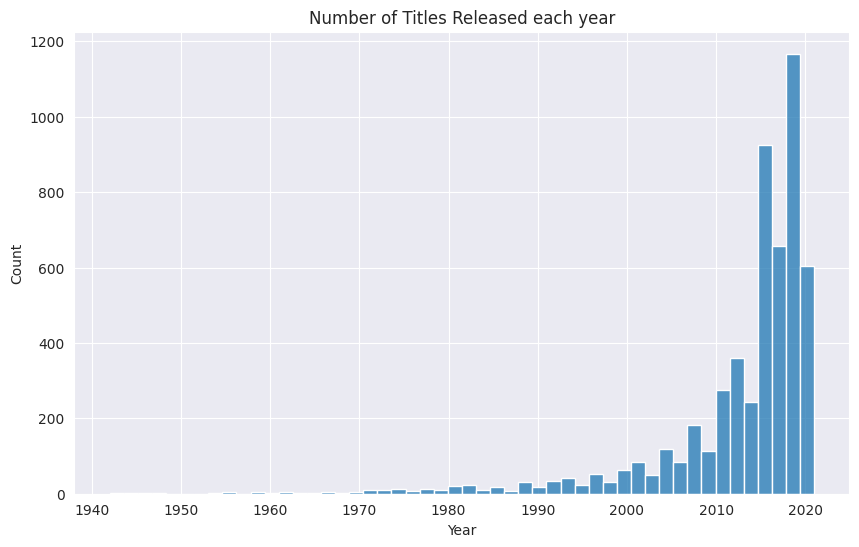

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='release_year', data=netflix_data_cleaned, bins=50)
plt.title("Number of Titles Released each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

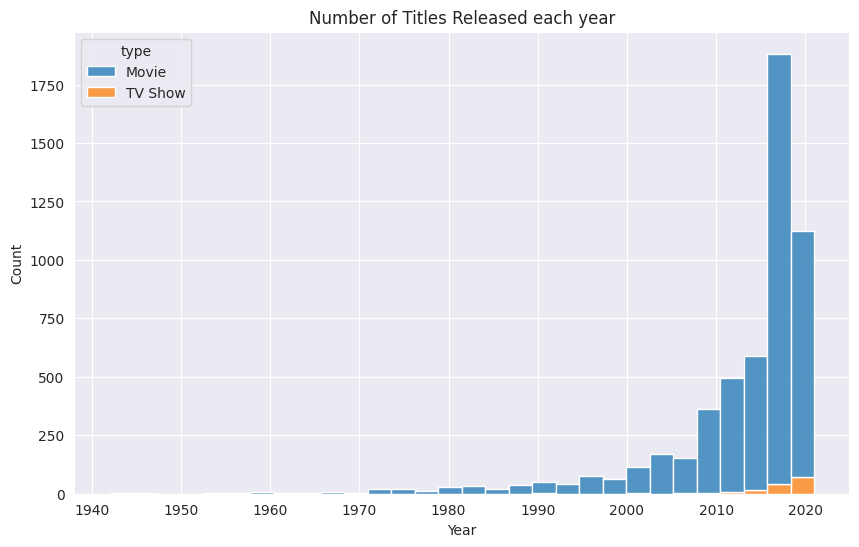

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x='release_year', data=netflix_data_cleaned, bins=30,hue='type', multiple='stack')
plt.title("Number of Titles Released each year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
from collections import Counter

In [ ]:
def get_top_elements(Column,n=10):
  all_elements = []
  for item in netflix_data_cleaned[Column]:
    elements = item.split(',')
    all_elements.extend(elements)
  elements_counts = Counter(all_elements)
  top_n = elements_counts.most_common(n)
  return top_n

In [ ]:
top_directors = get_top_elements('director',10)

In [ ]:
top_directors

[('Raúl Campos', 18),
 (' Jan Suter', 18),
 ('Marcus Raboy', 15),
 ('Jay Karas', 15),
 ('Cathy Garcia-Molina', 13),
 ('Youssef Chahine', 12),
 ('Martin Scorsese', 12),
 ('Jay Chapman', 12),
 ('Steven Spielberg', 11),
 ('Don Michael Paul', 10)]

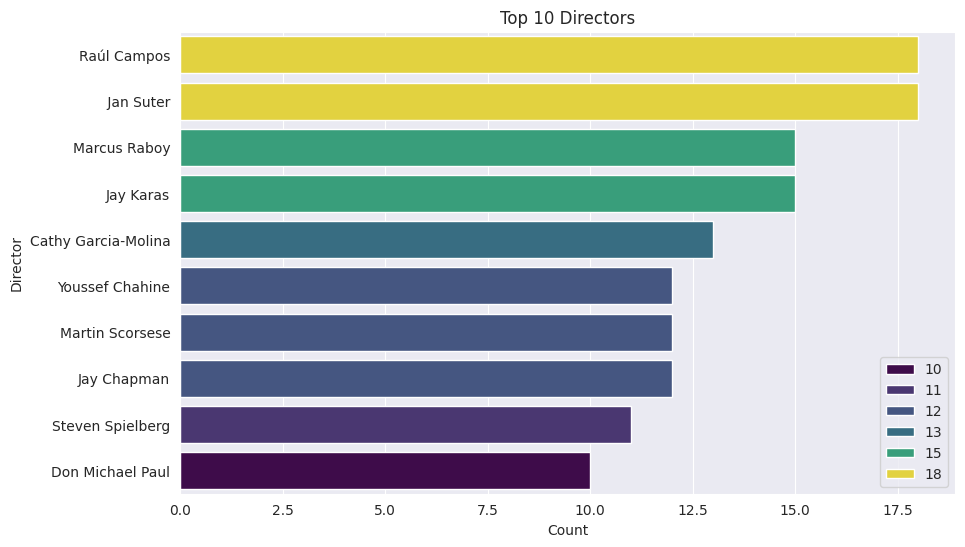

In [ ]:
directors, counts=zip(*top_directors)
plt.figure(figsize=(10,6))
sns.barplot(y=directors, x=counts,hue=counts, palette='viridis')
plt.title("Top 10 Directors")
plt.xlabel("Count")
plt.ylabel("Director")
plt.show()

In [ ]:
print("\n Top 10 Genres")
top_genres = netflix_data_cleaned['listed_in'].value_counts().head(10)
print(top_genres)


 Top 10 Genres
listed_in
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: count, dtype: int64


/tmp/ipython-input-3108086906.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


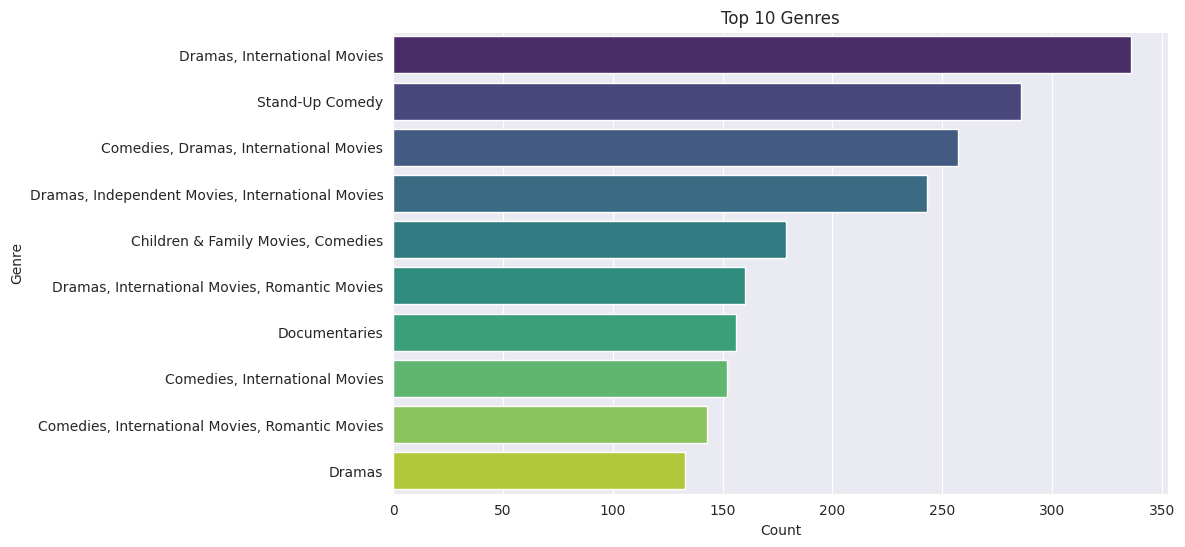

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title("Top 10 Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [ ]:
netflix_movies = netflix_data_cleaned[netflix_data_cleaned['type']=='Movie'].copy()
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min','').astype(int)

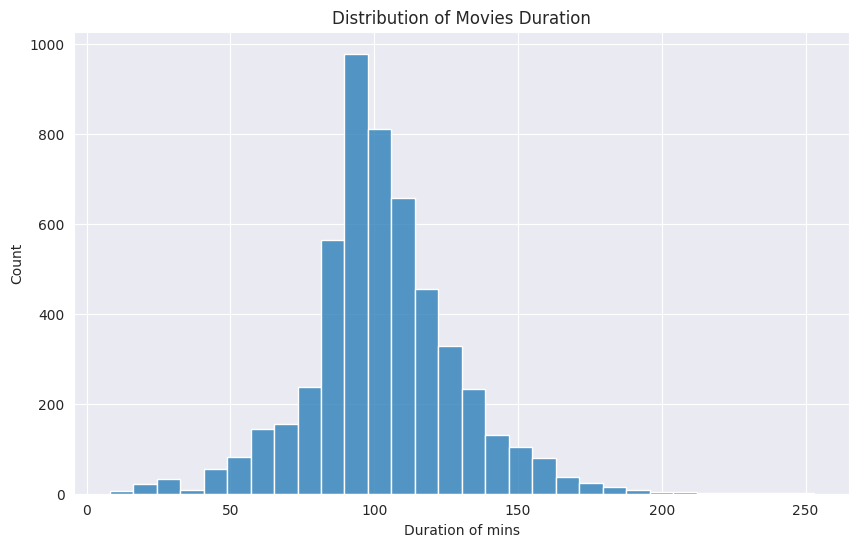

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(netflix_movies['duration'],bins=30)
plt.title("Distribution of Movies Duration")
plt.xlabel("Duration of mins")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-960496172.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries_content.index,x=top_countries_content.values ,palette="viridis")


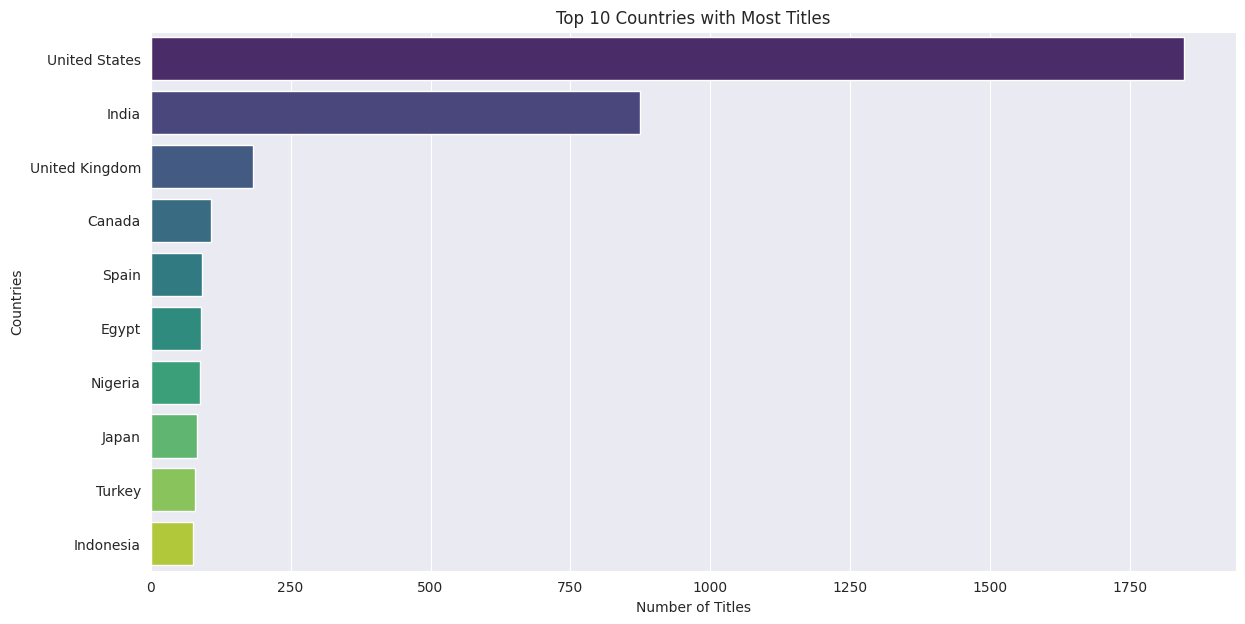

In [ ]:
top_countries_content = netflix_data_cleaned['country'].value_counts().head(10)
plt.figure(figsize=(14,7))
sns.barplot(y=top_countries_content.index,x=top_countries_content.values ,palette="viridis")
plt.title("Top 10 Countries with Most Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Countries")
plt.show()